In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
df=pd.read_csv('True values/miami_weather_complete.csv')
weather_df=df[['Datetime','actual_max_temp']]
weather_df=pd.DataFrame(weather_df)
weather_df['Datetime']=pd.to_datetime(weather_df['Datetime'])
print(weather_df.head())

    Datetime  actual_max_temp
0 2000-01-01             81.0
1 2000-01-02             79.0
2 2000-01-03             80.0
3 2000-01-04             80.0
4 2000-01-05             80.0


In [5]:
daily_maxtemp = weather_df.set_index('Datetime')


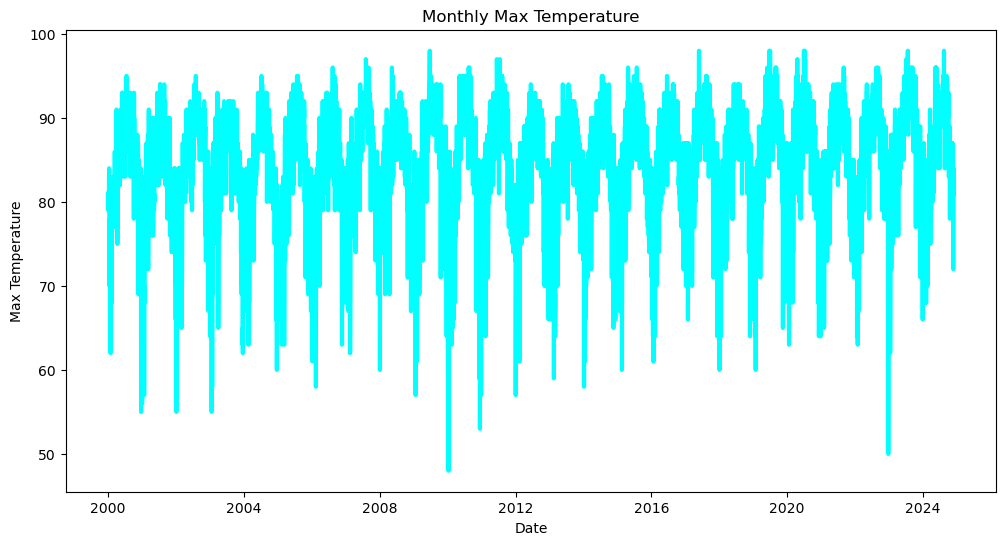

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(daily_maxtemp['actual_max_temp'], linewidth=3,c='cyan')
plt.title("Monthly Max Temperature")
plt.xlabel("Date")
plt.ylabel("Max Temperature")
plt.show()

In [7]:
def check_stationarity(timeseries):
    # Perform the Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')
    print('Stationary' if p_value < 0.05 else 'Non-Stationary')


check_stationarity(daily_maxtemp['actual_max_temp'])

ADF Statistic: -6.811142694124533
p-value: 2.1147754238767754e-09
Stationary


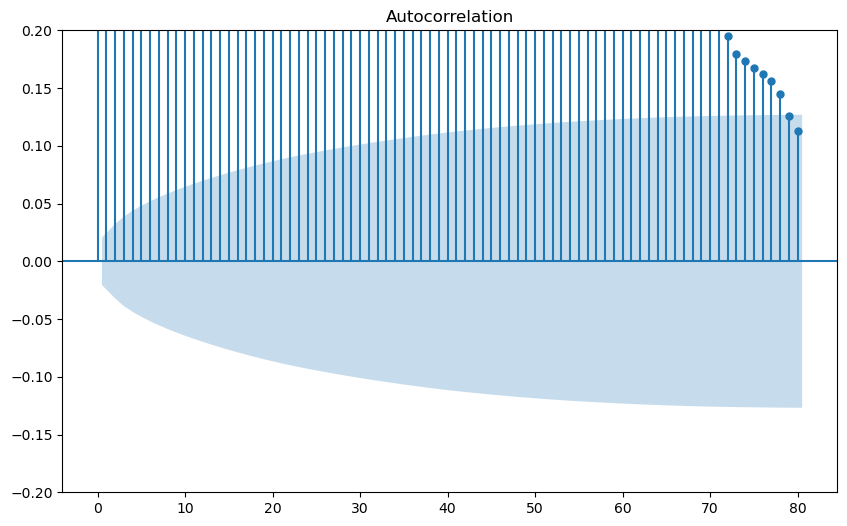

KeyboardInterrupt: 

In [8]:
# Plot ACF and PACF
fig, ax = plt.subplots(figsize=(10, 6))

plot_acf(daily_maxtemp, lags=80, ax=ax)


# Plot PACF
# plot_pacf(daily_maxtemp, lags=370, ax=ax)

# Zoom in on the confidence intervals by adjusting the y-axis limits
# You can change the value below to zoom in further or adjust as needed
ax.set_ylim(-0.2, 0.2)

plt.show()
plt.show()
from statsmodels.tsa.stattools import pacf
pacf_values = pacf(daily_maxtemp, nlags=800)

lags_subset = np.arange(720, 740)
pacf_subset = pacf_values[720:740]

# Plot the PACF values for lags 360 to 370
plt.figure(figsize=(10, 6))
plt.stem(lags_subset, pacf_subset)
plt.title("PACF for Lags 360 to 370")
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.grid(True)
plt.show()

In [ ]:
# Define SARIMA parameters
p, d, q = 1, 0, 1
P, D, Q, s = 1, 1, 1, 365  # Assuming yearly seasonality

# Fit the SARIMA model
model = SARIMAX(daily_maxtemp, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()
model

/opt/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [9]:
# Forecast future values
forecast_periods = 12  # Forecast the next 12 months/ days?
forecast = results.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_maxtemp, label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')

plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.title("SARIMA Forecast Temperature")
plt.xlabel("Date")
plt.ylabel("Max Temperature")
plt.legend()
plt.show()

NameError: name 'results' is not defined

In [ ]:
observed = daily_maxtemp[-forecast_periods:]
modified_observed = observed.drop(columns = "actual_max_temp")
mae = mean_absolute_error(modified_observed, forecast_mean)
mse = mean_squared_error(modified_observed, forecast_mean)
print(f'MAE: {mae}')
print(f'MSE: {mse}')

MAE: 3.595300811505146
MSE: 16.376640250868856
